<a href="https://colab.research.google.com/github/manishmcsa/CNN_EMNIST_Split_mnist_no_fc_model/blob/main/CNN_EMNIST_split_mnist_NO_FC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
  #Importing Libraries
import torch # Importing Pytorch library
import torch.nn as nn # import torch library for neyral nets
import torch.nn.functional as F # Importing torch library for performing arthmetic 
import torch.optim as optim  # implementing various optimization algorithms
import torchvision as torchvision
from torchvision import datasets, transforms # package consists of popular datasets, model architectures, and common image transformations for computer vision

In [4]:
#Building Neural Network

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3) #input = 28*28*1  OUtput - 26*26*10        
        self.conv2 = nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3) #input = 26*26*10  OUtput - 24*24*10   
        self.pool1 = nn.MaxPool2d(2, 2) #Input :24*24*10  Output : 12*12*10 Receptive field - 10*10                   
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3) #input = 12*12*10  OUtput - 10*10*20   
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=3) #input = 10*10*20  OUtput - 8*8*20     
        self.pool2 = nn.MaxPool2d(2, 2) #Input : 8*8*20   Output: 4*4*20                                              
        self.conv5 = nn.Conv2d(in_channels=20, out_channels=30, kernel_size=3) #input = 4*4*20  OUtput - 2*2*30 
        self.pool3 = nn.AvgPool2d(2, 2) # Input: 2*2*30 Ouput:1*1*30 
        self.conv6 = nn.Conv2d(in_channels=30, out_channels=10, kernel_size=1) #input = 1*1*30  OUtput - 1*1*10

    def forward(self, x):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x))))) # forward activation function using relu
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x))))) # forward activation function using relu
        x = self.pool3((F.relu(self.conv5(x)))) # forward activation function using relu
        x = F.relu(self.conv6(x)) # forward activation function using relu
        x = x.view(-1, 10) # reshape tensor for -1 is nu,mber of rows and 10 is column value i.e. predictions
        return F.log_softmax(x)

In [5]:
# undesratnding and printing the network structure and summary
!pip install torchsummary # package to print model summary
from torchsummary import summary # package to print model summary
use_cuda = torch.cuda.is_available() # toc check is GPU is available
device = torch.device("cuda" if use_cuda else "cpu") # enable device to GPU if available otherwise CPU
model=Net().to(device) #sending model to GPU
summary(model, input_size=(1, 28, 28)) # printing model summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             100
            Conv2d-2           [-1, 10, 24, 24]             910
         MaxPool2d-3           [-1, 10, 12, 12]               0
            Conv2d-4           [-1, 20, 10, 10]           1,820
            Conv2d-5             [-1, 20, 8, 8]           3,620
         MaxPool2d-6             [-1, 20, 4, 4]               0
            Conv2d-7             [-1, 30, 2, 2]           5,430
         AvgPool2d-8             [-1, 30, 1, 1]               0
            Conv2d-9             [-1, 10, 1, 1]             310
Total params: 12,190
Trainable params: 12,190
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 0.05
Estimated Total Size (MB): 0.18
---------------------------------------------

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [6]:
#torch.manual_seed(1)
batch_size = 256 # initializing batch size

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {} # defining data dictionary of specified arguments
# Download Trainset

train_loader = torch.utils.data.DataLoader(                 # downloading the train dataset
    datasets.EMNIST('../data', train=True, download=True,split='mnist',
    transform=transforms.Compose([
                                 transforms.ToTensor()
    ])
                    ),
    batch_size=batch_size, shuffle=True, **kwargs)

In [7]:
batch = next(iter(train_loader)) # defining the itererator to get 1batch of image sequentially
images,labels=batch              # mapping imgaes and labels in batch
labels.shape,images.shape

(torch.Size([256]), torch.Size([256, 1, 28, 28]))

labels: tensor([5, 9, 0, 9, 2, 2, 0, 5, 0, 7, 9, 5, 1, 0, 4, 4, 4, 4, 6, 6, 3, 7, 5, 6,
        8, 3, 5, 7, 9, 7, 7, 3, 5, 7, 8, 2, 1, 2, 1, 8, 4, 9, 1, 2, 6, 5, 3, 7,
        9, 7, 1, 7, 4, 7, 3, 4, 8, 2, 2, 9, 4, 8, 5, 2, 2, 2, 6, 5, 0, 4, 3, 4,
        7, 3, 8, 9, 9, 3, 1, 2, 2, 3, 6, 5, 2, 3, 0, 1, 8, 6, 6, 0, 1, 0, 2, 9,
        9, 3, 2, 8, 4, 4, 5, 1, 9, 2, 3, 9, 3, 8, 8, 6, 4, 9, 4, 0, 4, 9, 5, 1,
        2, 8, 5, 5, 3, 0, 9, 8, 7, 5, 2, 5, 9, 1, 0, 5, 1, 4, 1, 9, 4, 2, 6, 2,
        3, 9, 3, 5, 4, 7, 2, 9, 8, 5, 6, 8, 4, 5, 4, 4, 6, 2, 6, 1, 1, 7, 7, 2,
        4, 6, 9, 5, 6, 5, 9, 9, 3, 2, 5, 8, 3, 8, 5, 2, 6, 7, 3, 1, 3, 3, 5, 8,
        9, 8, 5, 2, 4, 5, 3, 8, 4, 7, 3, 9, 9, 0, 2, 3, 7, 0, 7, 0, 1, 8, 0, 1,
        9, 9, 4, 5, 2, 7, 4, 7, 3, 7, 1, 8, 7, 0, 0, 6, 4, 1, 2, 4, 4, 6, 3, 0,
        9, 3, 9, 7, 4, 0, 0, 7, 5, 4, 2, 9, 8, 6, 4, 0])


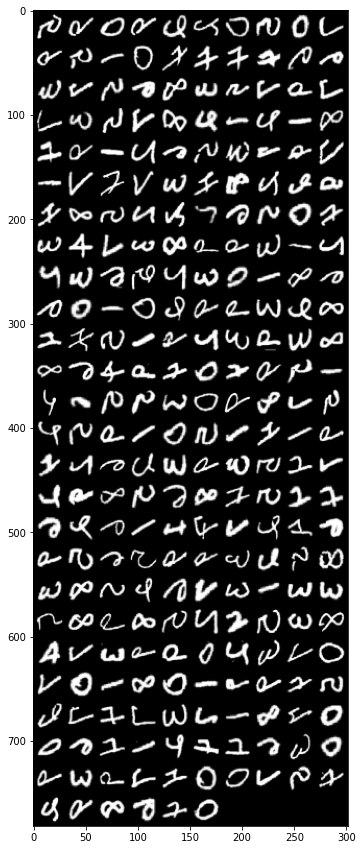

In [8]:
import matplotlib.pyplot as plt    #importing library to plot
import numpy as np                 # importing numpy library
grid = torchvision.utils.make_grid(images, nrow=10) # making grid of images with 10 rows
plt.figure(figsize=(15,15)) # dfeining the size of image to plot
plt.imshow(np.transpose(grid, (1,2,0))) # plot/how the image
print('labels:', labels) # printing the labels

In [9]:
# getting the number of correct prediction w.r.t to labels
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item() # pred.argmax will give value of highest prob of value predicted and compares with labels, 
                                                     # sum will keep adding the correct values and item will give the result of sum

In [10]:
#train_loader = torch.utils.data.DataLoader(train_loader, batch_size=batch_size)
network=Net()           # creating object of Network class
optimizer = optim.Adam(network.parameters(), lr=0.01) #initializing optimizer

for epoch in range(20): # loopng epoches

    total_loss = 0                      #Initializing variable to calculate total loss
    total_correct = 0                   #Initializing variable to calculate total correct

    for batch in train_loader: # Get Batch
        images, labels = batch 
        images,labels=images.to(device),labels.to(device) # mapping image and labels data to GPU
        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()  #zero_grad() is to restart looping without losses from last step during training model 
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item() # calculate total loss in an epoch
        total_correct += get_num_correct(preds, labels)  #calculate total correct in an epoch training
        acuracy=total_correct/70000

    print(                                          #printing epochwise total loss and total correct w.r.t labels
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss,
        "Accuracy", acuracy
    )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch 0 total_correct: 48362 loss: 129.84417924284935 Accuracy 0.6908857142857143
epoch 1 total_correct: 53018 loss: 68.98013155162334 Accuracy 0.7574
epoch 2 total_correct: 53233 loss: 65.92345136404037 Accuracy 0.7604714285714286
epoch 3 total_correct: 53413 loss: 63.29227527976036 Accuracy 0.7630428571428571
epoch 4 total_correct: 53473 loss: 62.29081183671951 Accuracy 0.7639
epoch 5 total_correct: 53524 loss: 61.70983837544918 Accuracy 0.7646285714285714
epoch 6 total_correct: 53503 loss: 61.3890373557806 Accuracy 0.7643285714285715
epoch 7 total_correct: 53550 loss: 60.99188840389252 Accuracy 0.765
epoch 8 total_correct: 53584 loss: 60.42152716964483 Accuracy 0.7654857142857143
epoch 9 total_correct: 53593 loss: 60.42717771232128 Accuracy 0.7656142857142857
epoch 10 total_correct: 53604 loss: 60.26660180091858 Accuracy 0.7657714285714285
epoch 11 total_correct: 53545 loss: 60.7612062394619 Accuracy 0.7649285714285714
epoch 12 total_correct: 53590 loss: 60.20931434631348 Accuracy 0